# **Downloading and extracting the dataset**
[Dataset](https://www.kaggle.com/ardamavi/sign-language-digits-dataset) , You'll have to update the download link.

In [0]:
url = 'https://storage.googleapis.com/kaggle-datasets/7836/11071/sign-language-digits-dataset.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1531928337&Signature=ep4rcuwF4%2BnZCX77aAQQ4PVYtgZ%2BsiVBKSJtKALIrulz9Djzx7qKqw7hEZnF%2BrCA2cJ362VwawtXkK%2Bm9r4HDJEd%2BqYBENZBF2iOxznQDf%2FDKU06ROnObvQBVu4uXVixblGLuJM78c1xpcK5Wcpa1qZISsYAO26MM5T8mnmCL03oVqroq7H1pS2Xm7tTuxdrporIfAfOJZALG0PsXN5STjgivFxyTV%2FlLmLi%2BZwh6tpIY9Phw4AoUwSH7SfBvO2oAnDY%2BDuCJWF%2Buppo43bXEN7ZSFqgnkcBdu9142uf%2BEfT8lukQCmKWmX1%2FROQ8NJwwgG5BVomi2A7mfPhKIz4xg%3D%3D'

In [51]:
from urllib import request
file_name = "train.zip"
request.urlretrieve(url, file_name)

('train.zip', <http.client.HTTPMessage at 0x7f3688f4b828>)

In [0]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

In [53]:
!ls

datalab  Sign-language-digits-dataset.zip  train.zip  X.npy  Y.npy


In [54]:
import zipfile as zf
train_zip = zf.ZipFile(file_name)
train_zip.extractall()
!ls

datalab  Sign-language-digits-dataset.zip  train.zip  X.npy  Y.npy


In [55]:
digit = zf.ZipFile('Sign-language-digits-dataset.zip')
digit.extractall()
!ls

datalab  Sign-language-digits-dataset.zip  train.zip  X.npy  Y.npy


In [0]:
X= np.load('X.npy')
y= np.load('Y.npy')


In [57]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

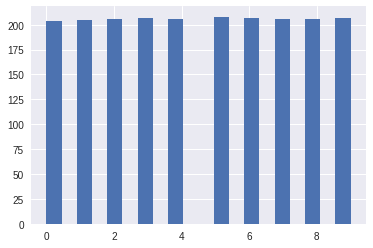

In [58]:
plt.hist(np.argmax(y, axis = 1),20)
plt.show()

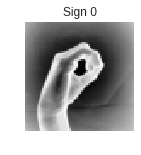

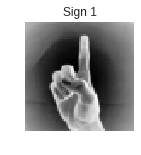

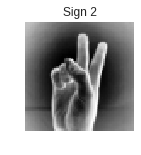

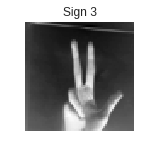

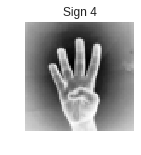

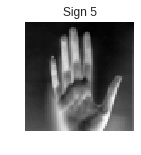

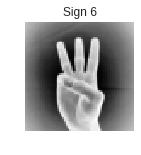

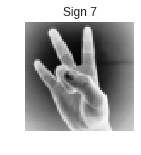

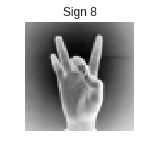

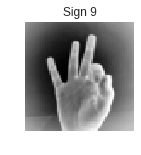

In [59]:
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
img_size=64

for each in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(X[image_index_list[each]].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()


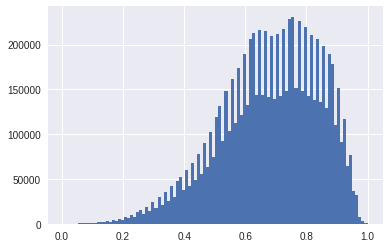

In [60]:
plt.hist(X.flatten(), 100)
plt.show()

In [0]:
X = X.reshape(list(X.shape) + [1])

In [62]:
X.shape

(2062, 64, 64, 1)

In [63]:
2062*.8

1649.6000000000001

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [0]:
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=13)

In [66]:
print(np.max(X_train[0]))


0.972549


# CNN

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

# build our CNN
model = Sequential()

# Convolutional Blocks: (1) Convolution, (2) Activation, (3) Pooling
model.add(Conv2D(input_shape=(64, 64, 1), filters=32, kernel_size=(4,4), strides=(2)))
model.add(Activation('relu'))
#outputs a (20, 20, 32) matrix
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1)))
model.add(Activation('relu'))
#outputs a (8, 8, 32) matrix
model.add(MaxPooling2D(pool_size=4))

model.add(Dropout(0.25))

#model.add(Flatten())
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


 ** Compile the model**

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

 ***Fit and train the model***

In [69]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data = (X_validate, y_validate))


Train on 1649 samples, validate on 206 samples
Epoch 1/20
1649/1649 [==============================] - 8s 5ms/step - loss: 0.3039 - acc: 0.9002 - val_loss: 0.2177 - val_acc: 0.9078
Epoch 2/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.1478 - acc: 0.9434 - val_loss: 0.1028 - val_acc: 0.9607
Epoch 3/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0991 - acc: 0.9640 - val_loss: 0.0870 - val_acc: 0.9612
Epoch 4/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0845 - acc: 0.9693 - val_loss: 0.0736 - val_acc: 0.9704
Epoch 5/20
1376/1649 [========================>.....] - ETA: 1s - loss: 0.0701 - acc: 0.9749

1649/1649 [==============================] - 7s 4ms/step - loss: 0.0708 - acc: 0.9748 - val_loss: 0.0695 - val_acc: 0.9738
Epoch 6/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0599 - acc: 0.9797 - val_loss: 0.0612 - val_acc: 0.9752
Epoch 7/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0514 - acc: 0.9820 - val_loss: 0.0488 - val_acc: 0.9840
Epoch 8/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0429 - acc: 0.9857 - val_loss: 0.0433 - val_acc: 0.9845
Epoch 9/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0386 - acc: 0.9870 - val_loss: 0.0432 - val_acc: 0.9830
Epoch 10/20
 512/1649 [========>.....................] - ETA: 4s - loss: 0.0384 - acc: 0.9869

1649/1649 [==============================] - 7s 4ms/step - loss: 0.0410 - acc: 0.9859 - val_loss: 0.0417 - val_acc: 0.9850
Epoch 11/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0321 - acc: 0.9902 - val_loss: 0.0368 - val_acc: 0.9854
Epoch 12/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0378 - val_acc: 0.9850
Epoch 13/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0242 - acc: 0.9919 - val_loss: 0.0303 - val_acc: 0.9908
Epoch 14/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0205 - acc: 0.9930 - val_loss: 0.0387 - val_acc: 0.9845
Epoch 15/20
 384/1649 [=====>........................] - ETA: 5s - loss: 0.0226 - acc: 0.9917

1649/1649 [==============================] - 7s 4ms/step - loss: 0.0221 - acc: 0.9925 - val_loss: 0.0334 - val_acc: 0.9859
Epoch 16/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0179 - acc: 0.9951 - val_loss: 0.0391 - val_acc: 0.9879
Epoch 17/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0186 - acc: 0.9946 - val_loss: 0.0293 - val_acc: 0.9913
Epoch 18/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0117 - acc: 0.9962 - val_loss: 0.0266 - val_acc: 0.9898
Epoch 19/20
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0111 - acc: 0.9969 - val_loss: 0.0301 - val_acc: 0.9908
Epoch 20/20
 384/1649 [=====>........................] - ETA: 5s - loss: 0.0084 - acc: 0.9974

1649/1649 [==============================] - 7s 4ms/step - loss: 0.0122 - acc: 0.9961 - val_loss: 0.0360 - val_acc: 0.9888


In [70]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 2.1252040197883826
Test accuracy: 99.03381570525791


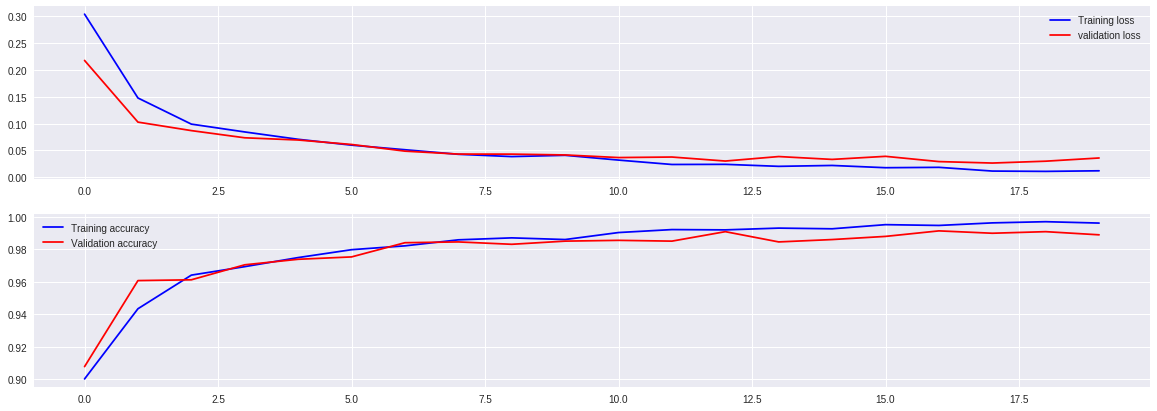

In [71]:
fig, ax = plt.subplots(2,1 , figsize=(20,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

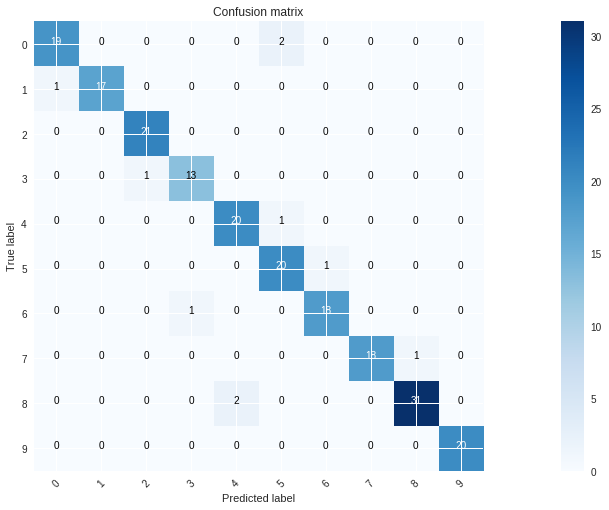

In [72]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))


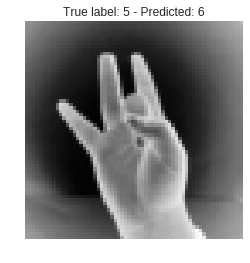

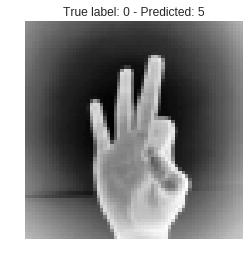

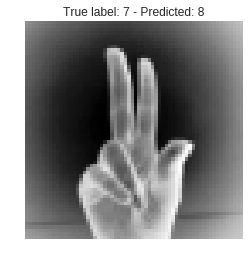

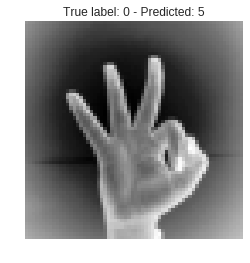

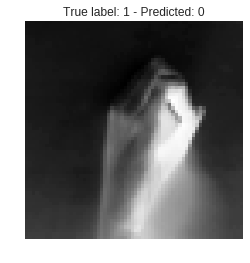

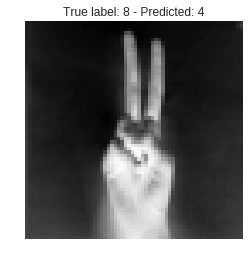

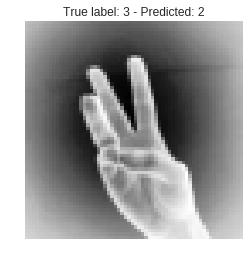

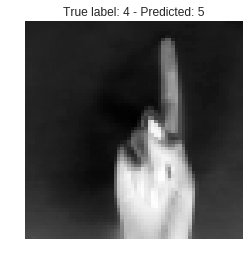

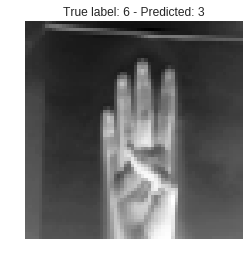

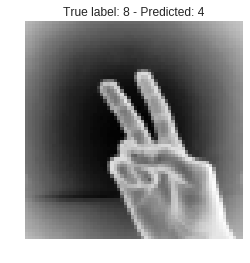

In [73]:
#wrong predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_cmp = np.argmax(y_test, axis = 1)
wrong_preds = (y_pred != y_test_cmp)
wrong_samples = X_test[wrong_preds]
for indx, sample in enumerate(wrong_samples):
  plt.figure()
  plt.axis('off')
  plt.title("True label: {} - Predicted: {}".format(y_test_cmp[wrong_preds][indx], y_pred[wrong_preds][indx]))
  plt.imshow(np.reshape(sample, (64,64)))
 

# ***Logistic Regression***

In [0]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(random_state=0)




In [0]:
X_logreg = X.reshape([X.shape[0], X.shape[1] * X.shape[2]])

In [76]:
X_logreg.shape


(2062, 4096)

In [77]:
y.shape

(2062, 10)

In [0]:
y_logreg= np.argmax(y, axis = 1)

In [79]:
y_logreg

array([0, 0, 0, ..., 9, 9, 9])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_logreg, y_logreg, test_size=0.15, random_state=8)

In [81]:
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = model2.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 

0.7645161290322581

In [84]:
model2.n_iter_


array([23], dtype=int32)

# ***Support Vector Machine***

In [85]:
from sklearn.svm import SVC
model3 = SVC(random_state=0)
X_svm = X.reshape([X.shape[0], X.shape[1] * X.shape[2]])
y_svm= np.argmax(y, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.15, random_state=8)
model3.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
y_pred = model3.predict(X_test)
accuracy_score(y_test, y_pred) 

0.4967741935483871